<a href="https://colab.research.google.com/github/yanil-03/python/blob/main/How_to_remove_outliers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\newdat\\newplacementdata.csv")

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [ ]:
# even  = ((n/2)+ ((n/2)+1))/2
# odd = ((n/2)+1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

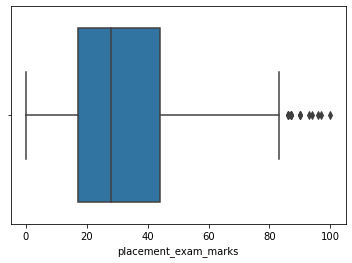

In [ ]:
sns.boxplot(x =  df['placement_exam_marks'])

In [ ]:
# Finding the IRQ

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [ ]:
percentile25

17.0

In [ ]:
percentile75

44.0

In [ ]:
IQR = percentile75 - percentile25
IQR

27.0

In [ ]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

84.5

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

# Finding Our Outliers

In [ ]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
# Trimming  ---> 4(lower).....1 , upper(25).....(50) ---> here 1,50 are outliers --->
# lower(4) <----> upper(25) mid data .

# Capping ---->  4(lower).....1 , upper(25).....(50) ---> capping lower point lowest point(1)
# upper point upper point(50)  ---> Range expand ---> outliers remove .

In [ ]:
# Trimming (Outlier Removing technique 1)

In [ ]:
newdf = df[df['placement_exam_marks'] < upper_limit]

In [ ]:
# newdf

In [ ]:
# Comparision

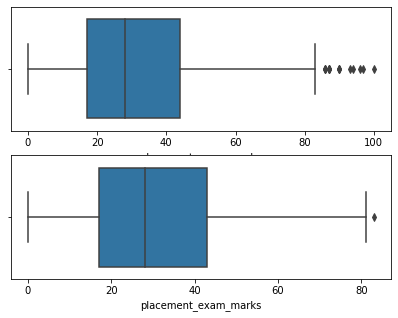

In [ ]:
plt.figure(figsize = (15,5))


plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])


plt.subplot(224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()


In [ ]:
# Capping(Outlier Removing technique 2)

In [ ]:
new_df_cap = df.copy()

In [ ]:
# min = 5  , max 15

# min 4 , 3 , 1
# max = 20 , 30 , 50

# updated_min_value = 1
# updated_max_value = 50

In [ ]:
new_df_cap['placement_exam_marks'] = np.where(

    new_df_cap['placement_exam_marks'] > upper_limit ,
    upper_limit ,

    np.where(
    new_df_cap['placement_exam_marks'] < lower_limit ,
    lower_limit ,
    new_df_cap['placement_exam_marks'])


)

In [ ]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
new_df_cap.shape

(1000, 3)

In [ ]:
# Comparision

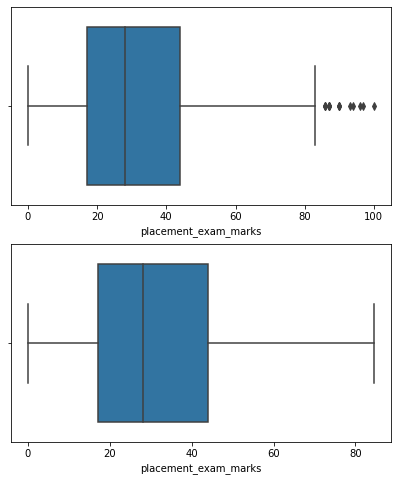

In [ ]:
plt.figure(figsize = (15,8))


plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])


plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show()

In [ ]:
# titanic dataset ---> Age ---> outliers ---> check
# Handle ---> triimng , capping .